In [1]:
!pip install opencv-python-headless matplotlib numpy

In [2]:
import cv2
print(cv2.__version__)

4.11.0


#Edge Detector Pembuluh Darah Citra Fundus pada Central Retinal Artery Occlusion

In [3]:
from PIL import Image
import numpy as np

img_pil = Image.open('citra4.jpg').convert('RGB')
img = np.array(img_pil)
print(type(img), img.shape)

<class 'numpy.ndarray'> (130, 150, 3)


<class 'numpy.ndarray'> (130, 150, 3) uint8


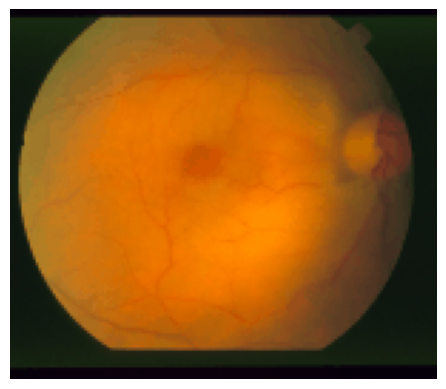

In [4]:
from PIL import Image
import numpy as np

img_pil = Image.open('citra4.jpg').convert('RGB')
img = np.array(img_pil)  # pastikan ini jadi numpy.ndarray
print(type(img), img.shape, img.dtype)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()


MENILAI CHANNEL TERBAIK DENGAN HISTOGRAM...


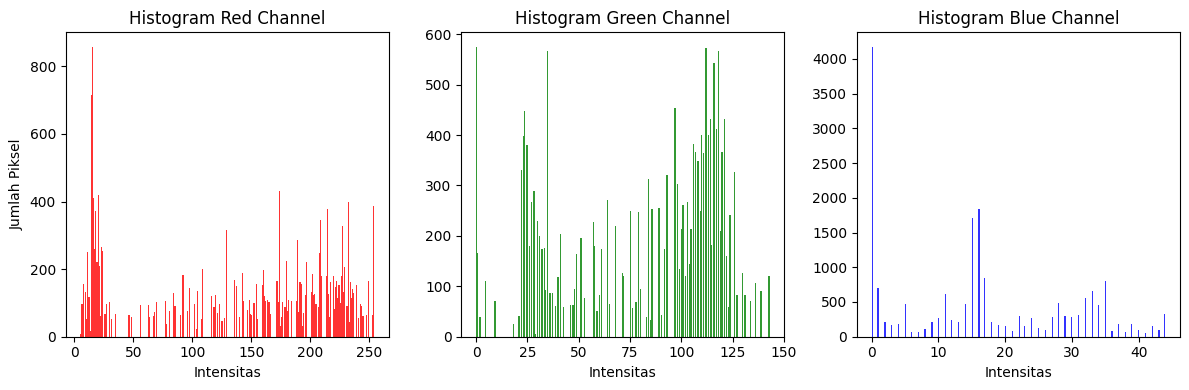

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

print("MENILAI CHANNEL TERBAIK DENGAN HISTOGRAM...")

# Buka gambar dan ubah ke RGB
pil_img = Image.open("citra4.jpg").convert("RGB")
img = np.array(pil_img)

# Ekstrak masing-masing channel
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

# Plot histogram ketiga channel
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(red.ravel(), bins=256, color='red', alpha=0.8)
plt.title("Histogram Red Channel")
plt.xlabel("Intensitas")
plt.ylabel("Jumlah Piksel")

plt.subplot(1, 3, 2)
plt.hist(green.ravel(), bins=256, color='green', alpha=0.8)
plt.title("Histogram Green Channel")
plt.xlabel("Intensitas")

plt.subplot(1, 3, 3)
plt.hist(blue.ravel(), bins=256, color='blue', alpha=0.8)
plt.title("Histogram Blue Channel")
plt.xlabel("Intensitas")

plt.tight_layout()
plt.show()



In [24]:
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Buka gambar
pil_img = Image.open("citra4.jpg").convert("RGB")
img = np.array(pil_img)

# Ekstrak channel
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

# Bentuk citra RGB dari masing-masing channel tunggal
red_rgb = np.stack([red, red, red], axis=2)
green_rgb = np.stack([green, green, green], axis=2)
blue_rgb = np.stack([blue, blue, blue], axis=2)

# Fungsi PSNR
def calculate_psnr(img1, img2):
    mse = np.mean((img1.astype(np.float64) - img2.astype(np.float64)) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * math.log10(max_pixel / np.sqrt(mse))

# Hitung PSNR untuk masing-masing channel
psnr_red = calculate_psnr(img, red_rgb)
psnr_green = calculate_psnr(img, green_rgb)
psnr_blue = calculate_psnr(img, blue_rgb)

# Tampilkan hasil
print("\n=== PSNR antara ORIGINAL RGB dengan channel RGB tunggal ===")
print(f"PSNR Original vs RED-only RGB   : {psnr_red:.2f} dB")
print(f"PSNR Original vs GREEN-only RGB : {psnr_green:.2f} dB")
print(f"PSNR Original vs BLUE-only RGB  : {psnr_blue:.2f} dB")



=== PSNR antara ORIGINAL RGB dengan channel RGB tunggal ===
PSNR Original vs RED-only RGB   : 8.44 dB
PSNR Original vs GREEN-only RGB : 12.33 dB
PSNR Original vs BLUE-only RGB  : 8.37 dB


TAHAP 1: Membuka gambar dan ekstraksi green channel...


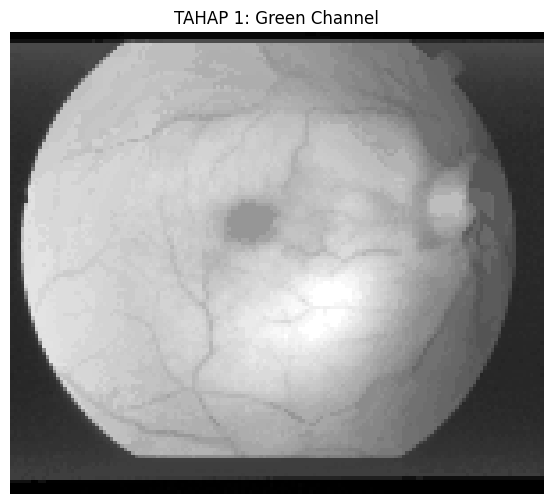

- Ukuran gambar: (130, 150)
- Range intensitas: 0 - 143
- Mean intensitas: 79.52


In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

print("TAHAP 1: Membuka gambar dan ekstraksi green channel...")

pil_img = Image.open("citra4.jpg").convert("RGB")
img = np.array(pil_img)
green = img[:, :, 1]

# Tampilkan
plt.figure(figsize=(8, 6))
plt.imshow(green, cmap='gray')
plt.title("TAHAP 1: Green Channel")
plt.axis('off')
plt.show()

print(f"- Ukuran gambar: {green.shape}")
print(f"- Range intensitas: {green.min()} - {green.max()}")
print(f"- Mean intensitas: {green.mean():.2f}")

TAHAP 2: Menerapkan CLAHE untuk perbaikan kontras lokal...


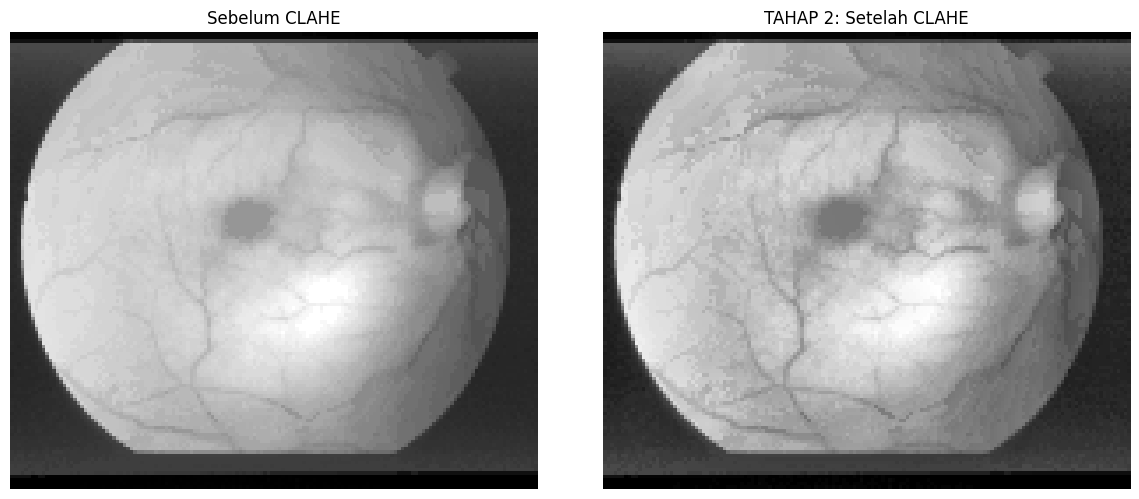

- Range intensitas setelah CLAHE: 3 - 160
- Mean intensitas setelah CLAHE: 87.17


In [ ]:
print("TAHAP 2: Menerapkan CLAHE untuk perbaikan kontras lokal...")

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(green)

# Tampilkan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(green, cmap='gray')
plt.title("Sebelum CLAHE")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("TAHAP 2: Setelah CLAHE")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"- Range intensitas setelah CLAHE: {clahe_img.min()} - {clahe_img.max()}")
print(f"- Mean intensitas setelah CLAHE: {clahe_img.mean():.2f}")

TAHAP 2: Perbandingan Histogram Equalization vs CLAHE


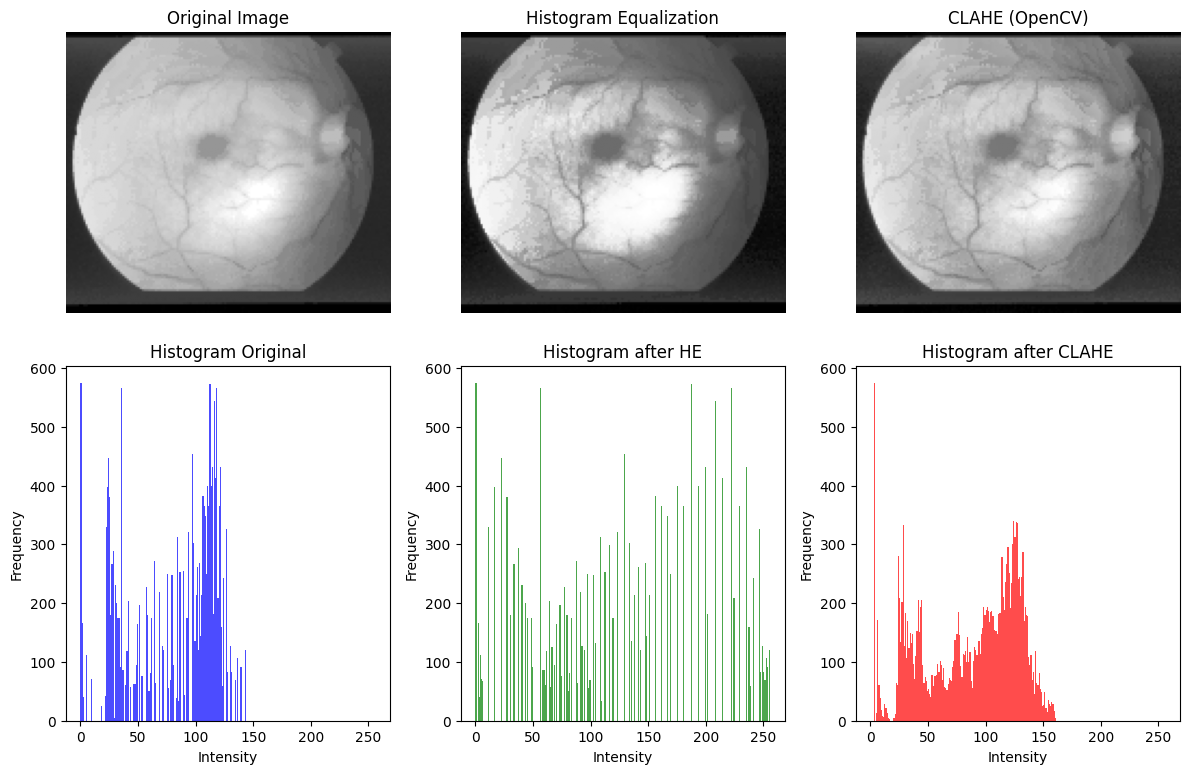

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("TAHAP 2: Perbandingan Histogram Equalization vs CLAHE")
print("="*60)

# Asumsi 'green' adalah channel hijau dari gambar grayscale atau RGB
# Misalnya:
# image = cv2.imread('your_image.jpg')
# green = image[:, :, 1]
# Untuk contoh ini, Anda harus memastikan 'green' sudah tersedia sebelumnya.

# 1. Original image
original = green.copy()

# 2. Histogram Equalization (Global)
hist_eq = cv2.equalizeHist(original)

# 3. CLAHE (OpenCV)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(original)

# ================================================================
# VISUALISASI GAMBAR
# ================================================================
plt.figure(figsize=(12, 8))

# Gambar
plt.subplot(2, 3, 1)
plt.imshow(original, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(hist_eq, cmap='gray')
plt.title("Histogram Equalization")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE (OpenCV)")
plt.axis('off')

# Histogram
plt.subplot(2, 3, 4)
plt.hist(original.flatten(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title("Histogram Original")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(2, 3, 5)
plt.hist(hist_eq.flatten(), bins=256, range=(0, 256), color='green', alpha=0.7)
plt.title("Histogram after HE")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(2, 3, 6)
plt.hist(clahe_img.flatten(), bins=256, range=(0, 256), color='red', alpha=0.7)
plt.title("Histogram after CLAHE")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [17]:
import math

# ================================================================
# FUNGSI: PSNR Manual
# ================================================================
def calculate_psnr(original, compared):
    mse = np.mean((original.astype(np.float64) - compared.astype(np.float64)) ** 2)
    if mse == 0:
        return float('inf')  # gambar identik
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr


psnr_he = calculate_psnr(original, hist_eq)
psnr_clahe = calculate_psnr(original, clahe_img)

# Tampilkan hasil
print("=== HASIL PSNR ===")
print(f"PSNR antara Original dan Histogram Equalization : {psnr_he:.2f} dB")
print(f"PSNR antara Original dan CLAHE                  : {psnr_clahe:.2f} dB")


=== HASIL PSNR ===
PSNR antara Original dan Histogram Equalization : 12.51 dB
PSNR antara Original dan CLAHE                  : 28.73 dB


TAHAP 3: Menerapkan Contrast Stretching setelah CLAHE


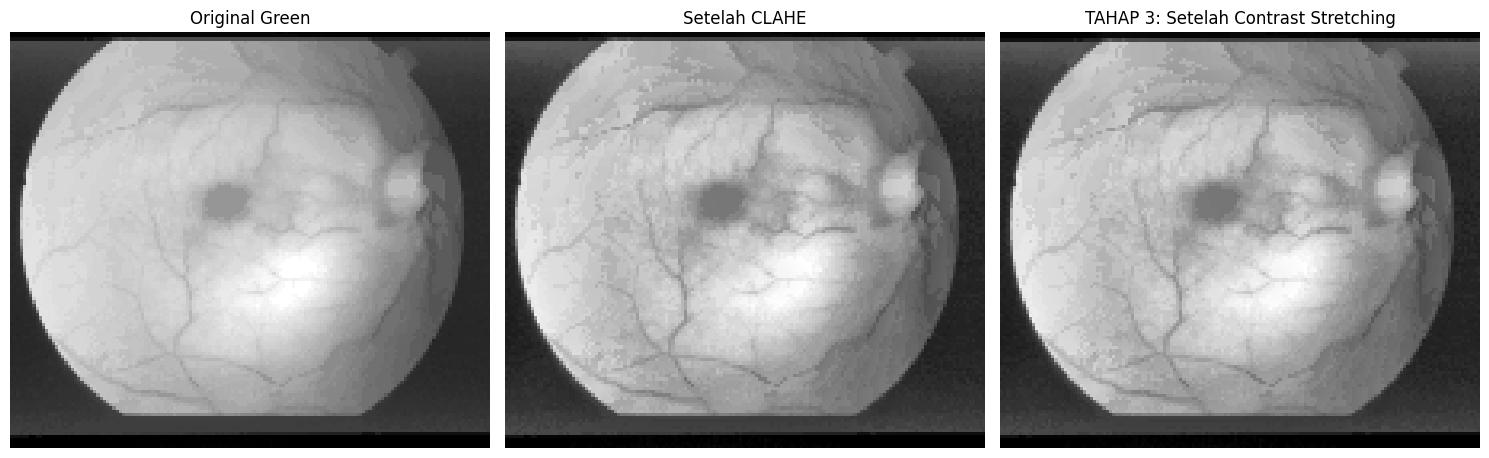

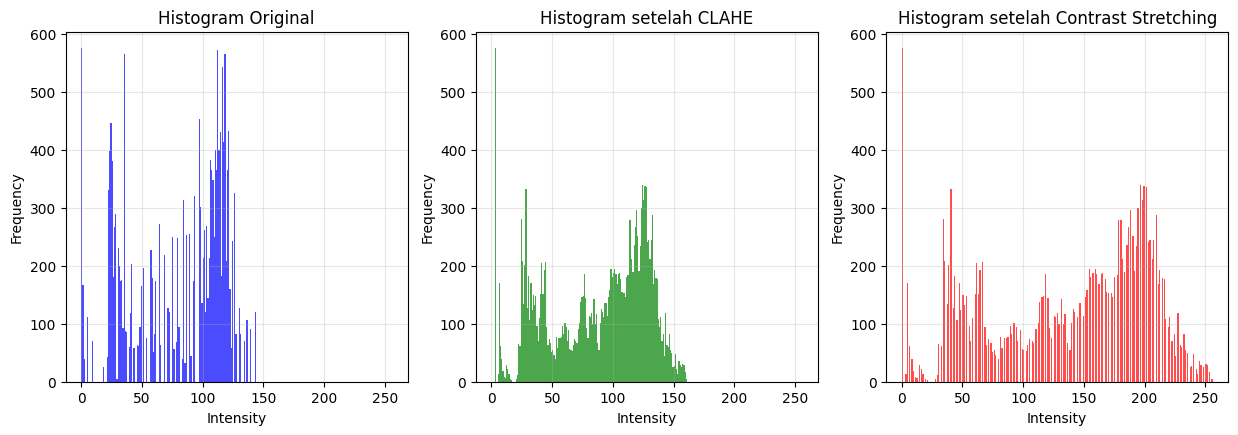

In [18]:
import numpy as np
import matplotlib.pyplot as plt

print("TAHAP 3: Menerapkan Contrast Stretching setelah CLAHE")

# ================================================================
# FUNGSI: Contrast Stretching
# ================================================================
def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = (image - min_val) * 255.0 / (max_val - min_val)
    return stretched.astype(np.uint8)

# Terapkan contrast stretching setelah CLAHE
sharpened = contrast_stretching(clahe_img)

# ================================================================
# VISUALISASI HASIL
# ================================================================
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(green, cmap='gray')
plt.title("Original Green")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("Setelah CLAHE")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title("TAHAP 3: Setelah Contrast Stretching")
plt.axis('off')

plt.tight_layout()
plt.show()

# ================================================================
# HISTOGRAM COMPARISON
# ================================================================
plt.figure(figsize=(15, 10))

# Baris 1: Individual histograms
plt.subplot(2, 3, 1)
plt.hist(green.flatten(), bins=256, range=(0, 256), alpha=0.7, color='blue')
plt.title("Histogram Original")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.hist(clahe_img.flatten(), bins=256, range=(0, 256), alpha=0.7, color='green')
plt.title("Histogram setelah CLAHE")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
plt.hist(sharpened.flatten(), bins=256, range=(0, 256), alpha=0.7, color='red')
plt.title("Histogram setelah Contrast Stretching")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)




TAHAP 4: Menerapkan Standard Canny Edge Detection...


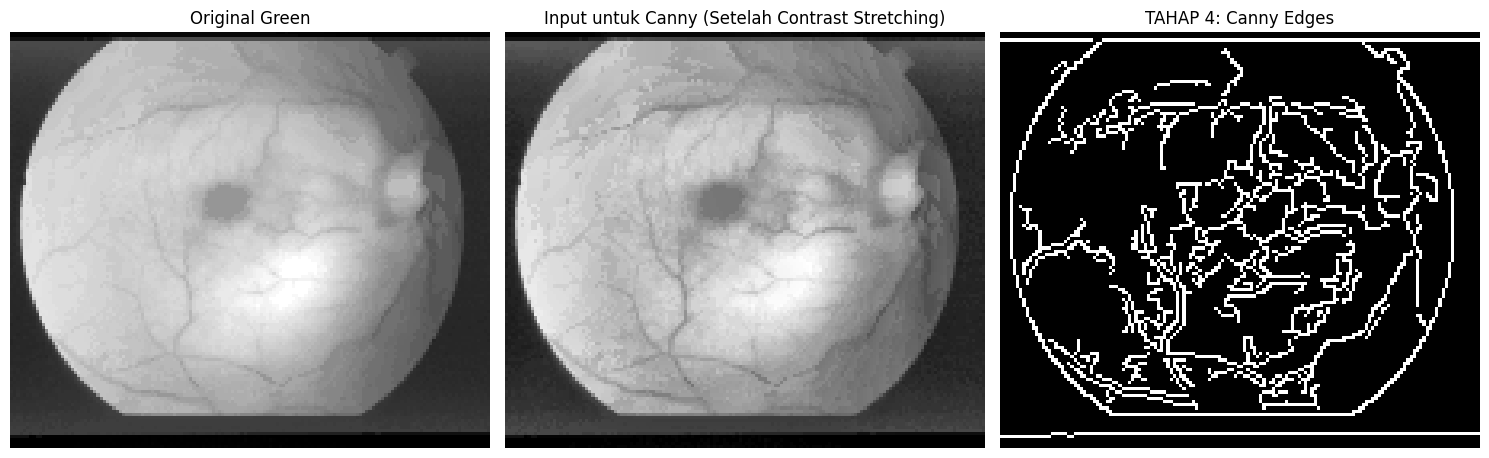

In [20]:
import cv2  # pastikan tetap menggunakan OpenCV untuk Canny

print("TAHAP 4: Menerapkan Standard Canny Edge Detection...")

# Gunakan hasil contrast stretching sebagai input
canny_edges = cv2.Canny(sharpened, 50, 150)

# Tampilkan hasil tahap 4
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(green, cmap='gray')
plt.title("Original Green")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpened, cmap='gray')
plt.title("Input untuk Canny (Setelah Contrast Stretching)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title("TAHAP 4: Canny Edges")
plt.axis('off')

plt.tight_layout()
plt.show()


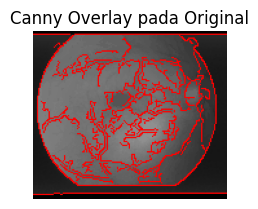

- Low threshold: 50
- High threshold: 150
- Jumlah pixel edge: 2763
- Persentase edge: 14.17%


In [21]:
overlay = cv2.cvtColor(green, cv2.COLOR_GRAY2RGB)
overlay[canny_edges > 0] = [255, 0, 0]  # Edge berwarna merah

plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.title("Canny Overlay pada Original")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"- Low threshold: 50")
print(f"- High threshold: 150")
print(f"- Jumlah pixel edge: {np.sum(canny_edges > 0)}")
print(f"- Persentase edge: {(np.sum(canny_edges > 0) / canny_edges.size) * 100:.2f}%")

#Mempertajam Pembuluh Darah Citra Fundus pada Background Diabetic Retinopathy

<class 'numpy.ndarray'> (130, 150, 3) uint8


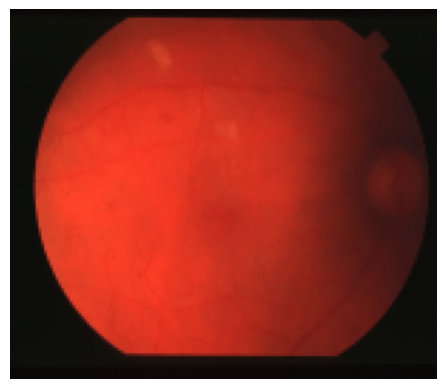

In [22]:
from PIL import Image
import numpy as np

img_pil = Image.open('citra13.jpg').convert('RGB')
img = np.array(img_pil)  # pastikan ini jadi numpy.ndarray
print(type(img), img.shape, img.dtype)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()

MENILAI CHANNEL TERBAIK DENGAN HISTOGRAM...


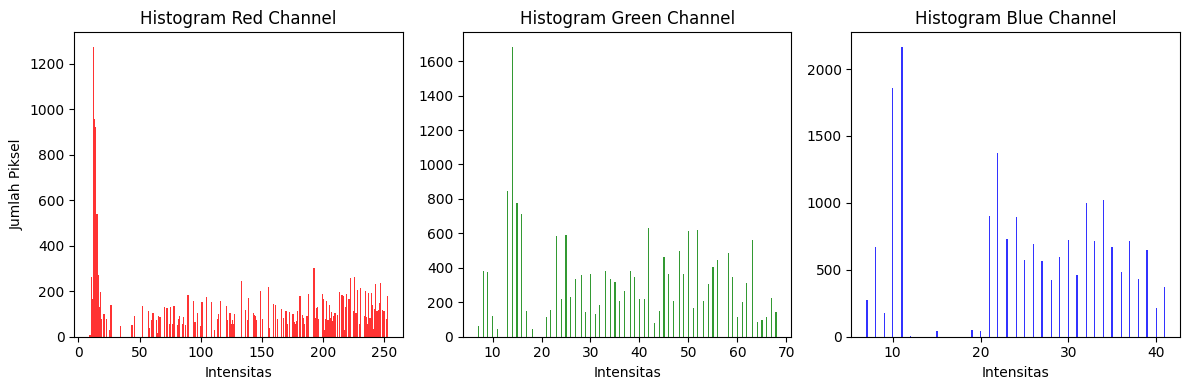

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

print("MENILAI CHANNEL TERBAIK DENGAN HISTOGRAM...")

# Buka gambar dan ubah ke RGB
pil_img = Image.open("citra13.jpg").convert("RGB")
img = np.array(pil_img)

# Ekstrak masing-masing channel
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

# Plot histogram ketiga channel
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(red.ravel(), bins=256, color='red', alpha=0.8)
plt.title("Histogram Red Channel")
plt.xlabel("Intensitas")
plt.ylabel("Jumlah Piksel")

plt.subplot(1, 3, 2)
plt.hist(green.ravel(), bins=256, color='green', alpha=0.8)
plt.title("Histogram Green Channel")
plt.xlabel("Intensitas")

plt.subplot(1, 3, 3)
plt.hist(blue.ravel(), bins=256, color='blue', alpha=0.8)
plt.title("Histogram Blue Channel")
plt.xlabel("Intensitas")

plt.tight_layout()
plt.show()



In [26]:
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Buka gambar
pil_img = Image.open("citra13.jpg").convert("RGB")
img = np.array(pil_img)

# Ekstrak channel
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

# Bentuk citra RGB dari masing-masing channel tunggal
red_rgb = np.stack([red, red, red], axis=2)
green_rgb = np.stack([green, green, green], axis=2)
blue_rgb = np.stack([blue, blue, blue], axis=2)

# Fungsi PSNR
def calculate_psnr(img1, img2):
    mse = np.mean((img1.astype(np.float64) - img2.astype(np.float64)) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * math.log10(max_pixel / np.sqrt(mse))

# Hitung PSNR untuk masing-masing channel
psnr_red = calculate_psnr(img, red_rgb)
psnr_green = calculate_psnr(img, green_rgb)
psnr_blue = calculate_psnr(img, blue_rgb)

# Tampilkan hasil
print("\n=== PSNR antara ORIGINAL RGB dengan channel RGB tunggal ===")
print(f"PSNR Original vs RED-only RGB   : {psnr_red:.2f} dB")
print(f"PSNR Original vs GREEN-only RGB : {psnr_green:.2f} dB")
print(f"PSNR Original vs BLUE-only RGB  : {psnr_blue:.2f} dB")



=== PSNR antara ORIGINAL RGB dengan channel RGB tunggal ===
PSNR Original vs RED-only RGB   : 8.07 dB
PSNR Original vs GREEN-only RGB : 11.51 dB
PSNR Original vs BLUE-only RGB  : 10.58 dB


TAHAP 1: Membuka gambar dan ekstraksi green channel...


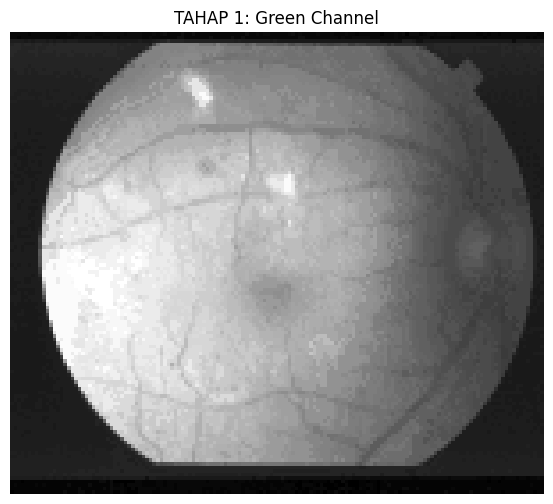

- Ukuran gambar: (130, 150)
- Range intensitas: 7 - 68
- Mean intensitas: 35.68


In [27]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

print("TAHAP 1: Membuka gambar dan ekstraksi green channel...")

pil_img = Image.open("citra13.jpg").convert("RGB")
img = np.array(pil_img)
green = img[:, :, 1]

# Tampilkan
plt.figure(figsize=(8, 6))
plt.imshow(green, cmap='gray')
plt.title("TAHAP 1: Green Channel")
plt.axis('off')
plt.show()

print(f"- Ukuran gambar: {green.shape}")
print(f"- Range intensitas: {green.min()} - {green.max()}")
print(f"- Mean intensitas: {green.mean():.2f}")

TAHAP 2: Menerapkan CLAHE untuk perbaikan kontras lokal...


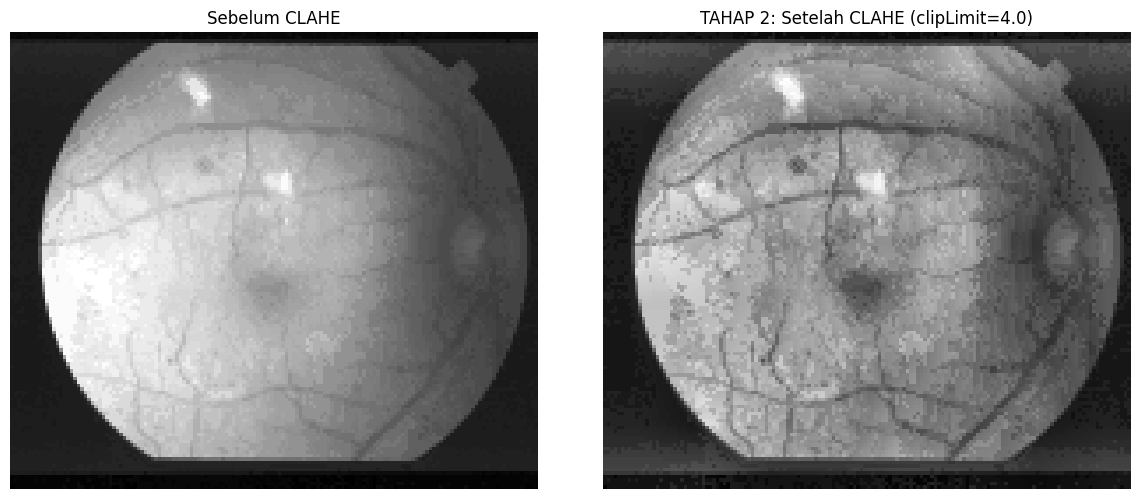

- Range intensitas setelah CLAHE: 7 - 119
- Mean intensitas setelah CLAHE: 55.08


In [28]:
print("TAHAP 2: Menerapkan CLAHE untuk perbaikan kontras lokal...")

# Tingkatkan clipLimit agar kontras lokal lebih kuat
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(green)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(green, cmap='gray')
plt.title("Sebelum CLAHE")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("TAHAP 2: Setelah CLAHE (clipLimit=4.0)")
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"- Range intensitas setelah CLAHE: {clahe_img.min()} - {clahe_img.max()}")
print(f"- Mean intensitas setelah CLAHE: {clahe_img.mean():.2f}")


TAHAP 2: Perbandingan Histogram Equalization vs CLAHE


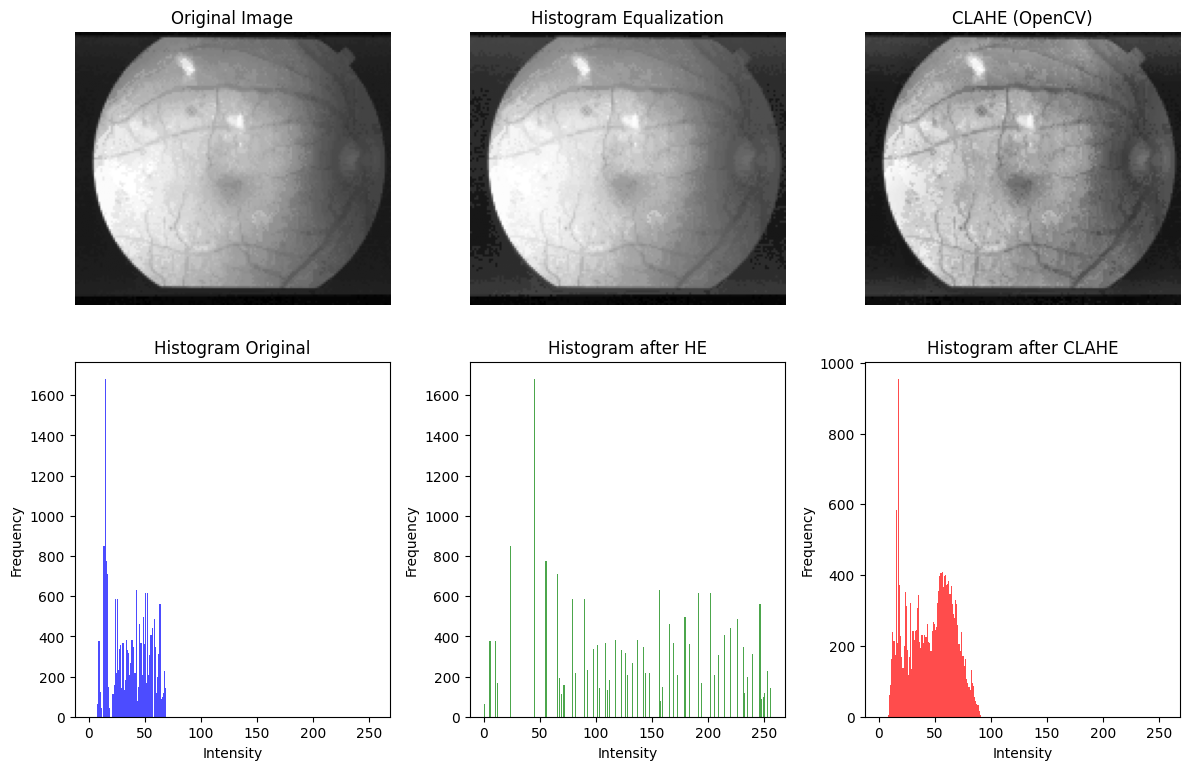

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("TAHAP 2: Perbandingan Histogram Equalization vs CLAHE")
print("="*60)

# Asumsi 'green' adalah channel hijau dari gambar grayscale atau RGB
# Misalnya:
# image = cv2.imread('your_image.jpg')
# green = image[:, :, 1]
# Untuk contoh ini, Anda harus memastikan 'green' sudah tersedia sebelumnya.

# 1. Original image
original = green.copy()

# 2. Histogram Equalization (Global)
hist_eq = cv2.equalizeHist(original)

# 3. CLAHE (OpenCV)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(original)

# ================================================================
# VISUALISASI GAMBAR
# ================================================================
plt.figure(figsize=(12, 8))

# Gambar
plt.subplot(2, 3, 1)
plt.imshow(original, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(hist_eq, cmap='gray')
plt.title("Histogram Equalization")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE (OpenCV)")
plt.axis('off')

# Histogram
plt.subplot(2, 3, 4)
plt.hist(original.flatten(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title("Histogram Original")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(2, 3, 5)
plt.hist(hist_eq.flatten(), bins=256, range=(0, 256), color='green', alpha=0.7)
plt.title("Histogram after HE")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.subplot(2, 3, 6)
plt.hist(clahe_img.flatten(), bins=256, range=(0, 256), color='red', alpha=0.7)
plt.title("Histogram after CLAHE")
plt.xlabel("Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [32]:
import math

# ================================================================
# FUNGSI: PSNR Manual
# ================================================================
def calculate_psnr(original, compared):
    mse = np.mean((original.astype(np.float64) - compared.astype(np.float64)) ** 2)
    if mse == 0:
        return float('inf')  # gambar identik
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

# ================================================================
# HITUNG PSNR UNTUK HASIL HISTOGRAM PROCESSING
# ================================================================
psnr_he = calculate_psnr(original, hist_eq)
psnr_clahe = calculate_psnr(original, clahe_img)

# Tampilkan hasil
print("=== HASIL PSNR ===")
print(f"PSNR antara Original dan Histogram Equalization : {psnr_he:.2f} dB")
print(f"PSNR antara Original dan CLAHE                  : {psnr_clahe:.2f} dB")


=== HASIL PSNR ===
PSNR antara Original dan Histogram Equalization : 7.32 dB
PSNR antara Original dan CLAHE                  : 27.44 dB


TAHAP 3: Menerapkan Contrast Stretching setelah CLAHE


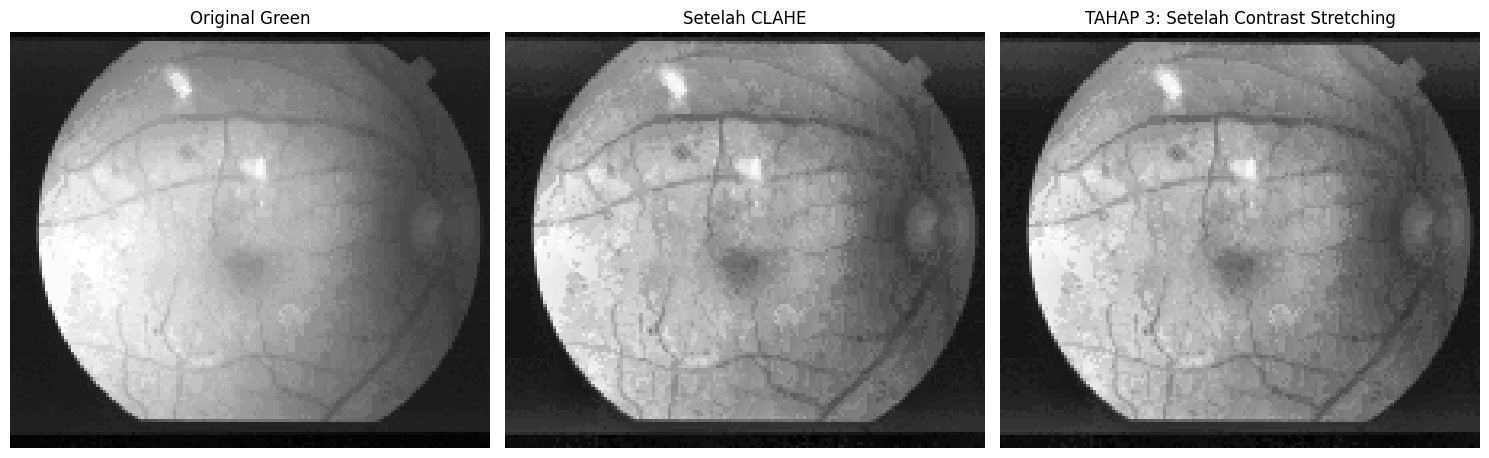

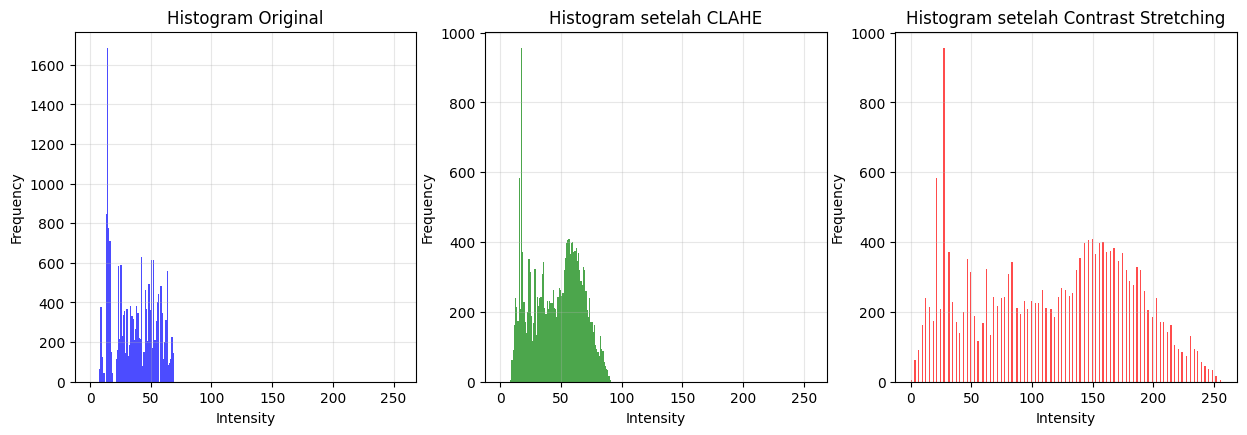

In [30]:
import numpy as np
import matplotlib.pyplot as plt

print("TAHAP 3: Menerapkan Contrast Stretching setelah CLAHE")

# ================================================================
# FUNGSI: Contrast Stretching
# ================================================================
def contrast_stretching(image):
    min_val = np.min(image)
    max_val = np.max(image)
    stretched = (image - min_val) * 255.0 / (max_val - min_val)
    return stretched.astype(np.uint8)

# Terapkan contrast stretching setelah CLAHE
sharpened = contrast_stretching(clahe_img)

# ================================================================
# VISUALISASI HASIL
# ================================================================
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(green, cmap='gray')
plt.title("Original Green")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("Setelah CLAHE")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title("TAHAP 3: Setelah Contrast Stretching")
plt.axis('off')

plt.tight_layout()
plt.show()

# ================================================================
# HISTOGRAM COMPARISON
# ================================================================
plt.figure(figsize=(15, 10))

# Baris 1: Individual histograms
plt.subplot(2, 3, 1)
plt.hist(green.flatten(), bins=256, range=(0, 256), alpha=0.7, color='blue')
plt.title("Histogram Original")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.hist(clahe_img.flatten(), bins=256, range=(0, 256), alpha=0.7, color='green')
plt.title("Histogram setelah CLAHE")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
plt.hist(sharpened.flatten(), bins=256, range=(0, 256), alpha=0.7, color='red')
plt.title("Histogram setelah Contrast Stretching")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)


